# CrowdTruth for Recognizing Textual Entailment Annotation

This analysis uses the data gathered in the "Recognizing Textual Entailment" crowdsourcing experiment published in *Rion Snow, Brendan O’Connor, Dan Jurafsky, and Andrew Y. Ng: Cheap and fast—but is it good? Evaluating non-expert annotations for natural language tasks. EMNLP 2008, pages 254–263*.

**Task Description**: Given *two sentences*, the crowd has to choose whether the second *hypothesis* sentence can be inferred from the first *sentence* (binary choice, true/false). Following, we provide an example from the aforementioned publication:

**Text**: “Crude Oil Prices Slump”

**Hypothesis**: “Oil prices drop”

A screenshot of the task as it appeared to workers can be seen at the following [repository](http://ai.stanford.edu/ ̃rion/annotations/).

The dataset for this task was downloaded from the following [repository](http://ai.stanford.edu/ ̃rion/annotations/), which contains the raw output from the crowd on AMT. Currently, you can find the processed input file in the folder named `data`. Besides the raw crowd annotations, the processed file also contains the text and the hypothesis that needs to be tested with the given text, which were given as input to the crowd.

In [1]:
import pandas as pd

test_data = pd.read_csv("../data/rte.standardized.csv")
test_data.head()

,!amt_annotation_ids,!amt_worker_ids,orig_id,response,gold,start,end,hypothesis,task,text
0,QYGZXTXJVZ2ZM9ZE32TZ6JJZWZ5T6YHZY8ZPAGFZ,A2K5ICP43ML4PW,25,0,0,Mon Mar 25 07:39:42 PDT 2019,Mon Mar 25 07:41:05 PDT 2019,Two films won six Oscars.,IR,"The film was the evening&apos;s big winner, ba..."
1,QYGZXTXJVZ2ZM9ZE32TZZRBZ6FH45T5ZVNYR6R9Z,A15L6WGIK3VU7N,25,0,0,Mon Mar 25 07:39:42 PDT 2019,Mon Mar 25 07:41:05 PDT 2019,Two films won six Oscars.,IR,"The film was the evening&apos;s big winner, ba..."
2,QYGZXTXJVZ2ZM9ZE32TZRKFZ26N8J0KZNDW94WMZ,AHPSMRLKAEJV,25,0,0,Mon Mar 25 07:39:42 PDT 2019,Mon Mar 25 07:41:05 PDT 2019,Two films won six Oscars.,IR,"The film was the evening&apos;s big winner, ba..."
3,QYGZXTXJVZ2ZM9ZE32TZWHHZS9YQHWHR4R4VVW0Z,A25QX7IUS1KI5E,25,0,0,Mon Mar 25 07:39:42 PDT 2019,Mon Mar 25 07:41:05 PDT 2019,Two films won six Oscars.,IR,"The film was the evening&apos;s big winner, ba..."
4,QYGZXTXJVZ2ZM9ZE32TZ0WPZYAYNMWWZWXYZ6YK0,A2RV3FIO3IAZS,25,0,0,Mon Mar 25 07:39:42 PDT 2019,Mon Mar 25 07:41:05 PDT 2019,Two films won six Oscars.,IR,"The film was the evening&apos;s big winner, ba..."


## Declaring a pre-processing configuration

The pre-processing configuration defines how to interpret the raw crowdsourcing input. To do this, we need to define a configuration class. First, we import the default CrowdTruth configuration class:

In [42]:
import crowdtruth
from crowdtruth.configuration import DefaultConfig

Our test class inherits the default configuration `DefaultConfig`, while also declaring some additional attributes that are specific to the Recognizing Textual Entailment task:

* **`inputColumns`:** list of input columns from the .csv file with the input data
* **`outputColumns`:** list of output columns from the .csv file with the answers from the workers
* **`customPlatformColumns`:** a list of columns from the .csv file that defines a standard annotation tasks, in the following order - judgment id, unit id, worker id, started time, submitted time. This variable is used for input files that do not come from AMT or FigureEight (formarly known as CrowdFlower).
* **`annotation_separator`:** string that separates between the crowd annotations in `outputColumns`
* **`open_ended_task`:** boolean variable defining whether the task is open-ended (i.e. the possible crowd annotations are not known beforehand, like in the case of free text input); in the task that we are processing, workers pick the answers from a pre-defined list, therefore the task is not open ended, and this variable is set to `False`
* **`annotation_vector`:** list of possible crowd answers, mandatory to declare when `open_ended_task` is `False`; for our task, this is the list of relations
* **`processJudgments`:** method that defines processing of the raw crowd data; for this task, we process the crowd answers to correspond to the values in `annotation_vector`

The complete configuration class is declared below:

In [43]:
class TestConfig(DefaultConfig):
    inputColumns = ["gold", "task", "text", "hypothesis"]
    outputColumns = ["response"]
    customPlatformColumns = ["!amt_annotation_ids", "orig_id", "!amt_worker_ids", "start", "end"]
    
    # processing of a closed task
    open_ended_task = True
    annotation_vector = ["0", "1"]
    
    def processJudgments(self, judgments):
        # pre-process output to match the values in annotation_vector
        for col in self.outputColumns:
            # transform to lowercase
            judgments[col] = judgments[col].apply(lambda x: str(x).lower())
        return judgments

## Pre-processing the input data

After declaring the configuration of our input file, we are ready to pre-process the crowd data:

In [44]:
data, config = crowdtruth.load(
    file = "../data/rte.standardized.csv",
    config = TestConfig()
)

data['judgments'].head()

,output.response,output.response.count,output.response.unique,started,unit,submitted,worker,duration,job
judgment,,,,,,,,,
QYGZXTXJVZ2ZM9ZE32TZ6JJZWZ5T6YHZY8ZPAGFZ,{u'0': 1},1,1,2019-03-25 07:39:42-07:00,25,2019-03-25 07:41:05-07:00,A2K5ICP43ML4PW,83,../data/rte.standardized
QYGZXTXJVZ2ZM9ZE32TZZRBZ6FH45T5ZVNYR6R9Z,{u'0': 1},1,1,2019-03-25 07:39:42-07:00,25,2019-03-25 07:41:05-07:00,A15L6WGIK3VU7N,83,../data/rte.standardized
QYGZXTXJVZ2ZM9ZE32TZRKFZ26N8J0KZNDW94WMZ,{u'0': 1},1,1,2019-03-25 07:39:42-07:00,25,2019-03-25 07:41:05-07:00,AHPSMRLKAEJV,83,../data/rte.standardized
QYGZXTXJVZ2ZM9ZE32TZWHHZS9YQHWHR4R4VVW0Z,{u'0': 1},1,1,2019-03-25 07:39:42-07:00,25,2019-03-25 07:41:05-07:00,A25QX7IUS1KI5E,83,../data/rte.standardized
QYGZXTXJVZ2ZM9ZE32TZ0WPZYAYNMWWZWXYZ6YK0,{u'0': 1},1,1,2019-03-25 07:39:42-07:00,25,2019-03-25 07:41:05-07:00,A2RV3FIO3IAZS,83,../data/rte.standardized


## Computing the CrowdTruth metrics

The pre-processed data can then be used to calculate the CrowdTruth metrics:

In [45]:
results = crowdtruth.run(data, config)

`results` is a dict object that contains the quality metrics for the sentences, annotations and crowd workers.

The **sentence metrics** are stored in `results["units"]`:

In [46]:
results["units"].head()

,duration,input.gold,input.hypothesis,input.task,input.text,job,output.response,output.response.annotations,output.response.unique_annotations,worker,uqs,unit_annotation_score,uqs_initial,unit_annotation_score_initial
unit,,,,,,,,,,,,,,
25,83,0,Two films won six Oscars.,IR,"The film was the evening&apos;s big winner, ba...",../data/rte.standardized,"{u'1': 2, u'0': 8}",10,2,10,0.870673,"{u'1': 0.0605933753083, u'0': 0.939406624692}",0.644444,"{u'1': 0.2, u'0': 0.8}"
35,83,1,Saudi Arabia is the world&apos;s biggest oil e...,PP,"Saudi Arabia, the biggest oil producer in the ...",../data/rte.standardized,"{u'1': 4, u'0': 6}",10,2,10,0.898253,"{u'1': 0.953208327378, u'0': 0.046791672622}",0.800000,"{u'1': 0.9, u'0': 0.1}"
39,83,1,Bill Clinton received a reported $10 million a...,PP,Mr. Clinton received a hefty advance for the b...,../data/rte.standardized,"{u'1': 9, u'0': 1}",10,2,10,0.939652,"{u'1': 0.972834001561, u'0': 0.0271659984386}",0.800000,"{u'1': 0.9, u'0': 0.1}"
48,83,1,Clinton is articulate.,PP,Clinton is a very charismatic person.,../data/rte.standardized,"{u'1': 4, u'0': 6}",10,2,10,0.898253,"{u'1': 0.953208327378, u'0': 0.046791672622}",0.800000,"{u'1': 0.9, u'0': 0.1}"
49,83,1,Argentina sees upsurge in kidnappings.,IR,Kidnappings in Argentina have increased more t...,../data/rte.standardized,"{u'1': 10, u'0': 0}",10,1,10,0.870673,"{u'1': 0.0605933753083, u'0': 0.939406624692}",0.644444,"{u'1': 0.2, u'0': 0.8}"


The `uqs` column in `results["units"]` contains the **sentence quality scores**, capturing the overall workers agreement over each sentences. Here we plot its histogram:

Text(0,0.5,'# Units')

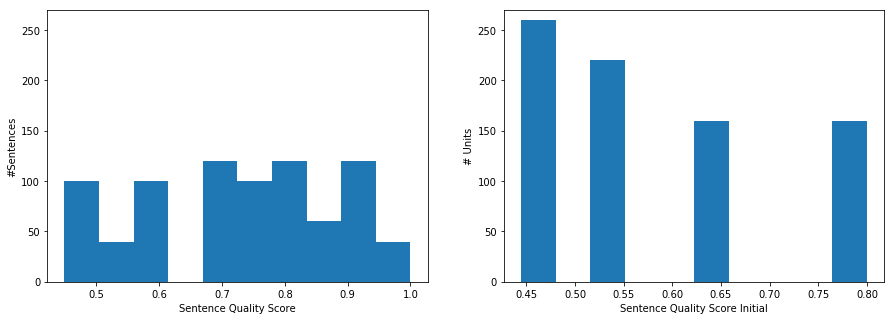

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 15, 5

plt.subplot(1, 2, 1)
plt.hist(results["units"]["uqs"])
plt.ylim(0,270)
plt.xlabel("Sentence Quality Score")
plt.ylabel("#Sentences")

plt.subplot(1, 2, 2)
plt.hist(results["units"]["uqs_initial"])
plt.ylim(0,270)
plt.xlabel("Sentence Quality Score Initial")
plt.ylabel("# Units")


### Plot the change in unit qualtity score at the beginning of the process and at the end

Text(0.5,0,'Sentence Index')

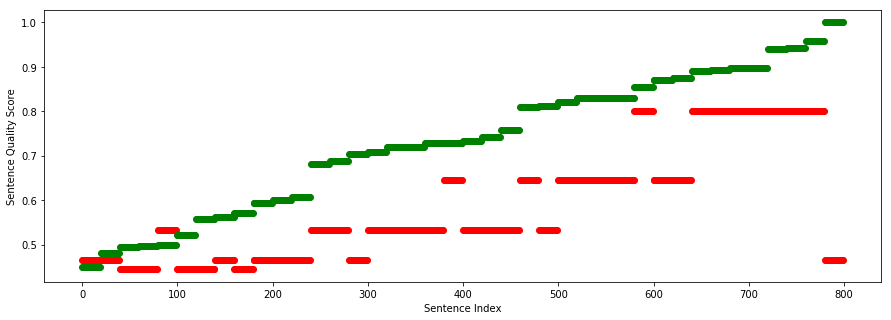

In [48]:
import numpy as np

sortUQS = results["units"].sort_values(['uqs'], ascending=[1])
sortUQS = sortUQS.reset_index()

plt.rcParams['figure.figsize'] = 15, 5

plt.plot(np.arange(sortUQS.shape[0]), sortUQS["uqs_initial"], 'ro', lw = 1, label = "Initial UQS")
plt.plot(np.arange(sortUQS.shape[0]), sortUQS["uqs"], 'go', lw = 1, label = "Final UQS")

plt.ylabel('Sentence Quality Score')
plt.xlabel('Sentence Index')

The `unit_annotation_score` column in `results["units"]` contains the **sentence-annotation scores**, capturing the likelihood that an annotation is expressed in a sentence. For each sentence, we store a dictionary mapping each annotation to its sentence-relation score.

In [49]:
results["units"]["unit_annotation_score"].head()

unit
25    {u'1': 0.0605933753083, u'0': 0.939406624692}
35     {u'1': 0.953208327378, u'0': 0.046791672622}
39    {u'1': 0.972834001561, u'0': 0.0271659984386}
48     {u'1': 0.953208327378, u'0': 0.046791672622}
49    {u'1': 0.0605933753083, u'0': 0.939406624692}
Name: unit_annotation_score, dtype: object

Save unit metrics:

In [50]:
rows = []
header = ["orig_id", "gold", "hypothesis", "text", "uqs", "uqs_initial", "true", "false", "true_initial", "false_initial"]

units = results["units"].reset_index()
for i in range(len(units.index)):
    row = [units["unit"].iloc[i], units["input.gold"].iloc[i], units["input.hypothesis"].iloc[i], \
           units["input.text"].iloc[i], units["uqs"].iloc[i], units["uqs_initial"].iloc[i], \
           units["unit_annotation_score"].iloc[i]["1"], units["unit_annotation_score"].iloc[i]["0"], \
           units["unit_annotation_score_initial"].iloc[i]["1"], units["unit_annotation_score_initial"].iloc[i]["0"]]
    rows.append(row)
rows = pd.DataFrame(rows, columns=header)
rows.to_csv("../data/results/crowdtruth_units_rte.csv", index=False)

The **worker metrics** are stored in `results["workers"]`:

In [51]:
results["workers"].head()

,duration,job,judgment,unit,wqs,wwa,wsa,wqs_initial,wwa_initial,wsa_initial
worker,,,,,,,,,,
A11GX90QFWDLMM,83,1,38,760,0.185667,0.396227,0.468587,0.249890,0.421053,0.593488
A14JQX7IFAICP0,83,1,9,180,0.214603,0.421422,0.509237,0.256515,0.444444,0.577159
A14Q86RX5HGCN,83,1,1,20,0.916561,0.920018,0.996242,0.454834,0.888889,0.511688
A14WWG6NKBDWGP,83,1,1,20,0.816726,0.832982,0.980485,0.261606,0.666667,0.392409
A151VN1BOY29J1,83,1,2,40,0.084084,0.250323,0.335903,0.168142,0.333333,0.504426


The `wqs` columns in `results["workers"]` contains the **worker quality scores**, capturing the overall agreement between one worker and all the other workers.

Text(0,0.5,'#Workers')

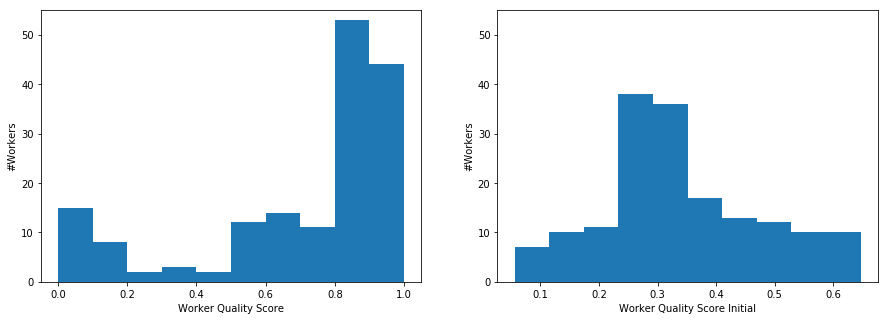

In [52]:
plt.rcParams['figure.figsize'] = 15, 5

plt.subplot(1, 2, 1)
plt.hist(results["workers"]["wqs"])
plt.ylim(0,55)
plt.xlabel("Worker Quality Score")
plt.ylabel("#Workers")

plt.subplot(1, 2, 2)
plt.hist(results["workers"]["wqs_initial"])
plt.ylim(0,55)
plt.xlabel("Worker Quality Score Initial")
plt.ylabel("#Workers")



Save the worker metrics:

In [53]:
results["workers"].to_csv("../data/results/crowdtruth_workers_rte.csv", index=True)

The **annotation metrics** are stored in `results["annotations"]`. The `aqs` column contains the **annotation quality scores**, capturing the overall worker agreement over one relation.

In [54]:
results["annotations"]

,output.response
0,3419.0
1,4581.0


In [55]:
sortedUQS = results["units"].sort_values(["uqs"])

### Example of a very clear unit

In [56]:
sortedUQS.tail(1)

,duration,input.gold,input.hypothesis,input.task,input.text,job,output.response,output.response.annotations,output.response.unique_annotations,worker,uqs,unit_annotation_score,uqs_initial,unit_annotation_score_initial
unit,,,,,,,,,,,,,,
1142,83,1,Whooping cough is also called pertussis.,RC,"Whooping cough, or pertussis, is a highly cont...",../data/rte.standardized,"{u'1': 10, u'0': 0}",10,1,10,1.0,"{u'1': 1.0, u'0': 5.27334010628e-100}",0.466667,"{u'1': 0.6, u'0': 0.4}"


In [57]:
print("Hypothesis: %s" % sortedUQS["input.hypothesis"].iloc[len(sortedUQS.index)-1])
print("Text: %s" % sortedUQS["input.text"].iloc[len(sortedUQS.index)-1])
print("Expert Answer: %s" % sortedUQS["input.gold"].iloc[len(sortedUQS.index)-1])
print("Crowd Answer with CrowdTruth: %s" % sortedUQS["unit_annotation_score"].iloc[len(sortedUQS.index)-1])
print("Crowd Answer without CrowdTruth: %s" % sortedUQS["unit_annotation_score_initial"].iloc[len(sortedUQS.index)-1])

Hypothesis: Whooping cough is also called pertussis.
Text: Whooping cough, or pertussis, is a highly contagious bacterial infection characterized by violent coughing fits, gasps for air that resemble &quot;whoop&quot; sounds, and vomiting.
Expert Answer: 1
Crowd Answer with CrowdTruth: Counter({'1': 1.0, '0': 5.273340106284002e-100})
Crowd Answer without CrowdTruth: Counter({'1': 0.6, '0': 0.4})


### Example of an unclear unit

In [58]:
sortedUQS.head(1)

,duration,input.gold,input.hypothesis,input.task,input.text,job,output.response,output.response.annotations,output.response.unique_annotations,worker,uqs,unit_annotation_score,uqs_initial,unit_annotation_score_initial
unit,,,,,,,,,,,,,,
278,83,1,Haitian military is not allowed to leave Haiti.,IR,The council has prohibited any travel outside ...,../data/rte.standardized,"{u'1': 9, u'0': 1}",10,2,10,0.44918,"{u'1': 0.598158040471, u'0': 0.401841959529}",0.466667,"{u'1': 0.6, u'0': 0.4}"


In [59]:
print("Hypothesis: %s" % sortedUQS["input.hypothesis"].iloc[0])
print("Text: %s" % sortedUQS["input.text"].iloc[0])
print("Expert Answer: %s" % sortedUQS["input.gold"].iloc[0])
print("Crowd Answer with CrowdTruth: %s" % sortedUQS["unit_annotation_score"].iloc[0])
print("Crowd Answer without CrowdTruth: %s" % sortedUQS["unit_annotation_score_initial"].iloc[0])

Hypothesis: Haitian military is not allowed to leave Haiti.
Text: The council has prohibited any travel outside of Haiti by all officers of the Haitian military and police and all major participants in the September, 1991, coup.
Expert Answer: 1
Crowd Answer with CrowdTruth: Counter({'1': 0.5981580404707015, '0': 0.4018419595292987})
Crowd Answer without CrowdTruth: Counter({'1': 0.6, '0': 0.4})


# MACE for Recognizing Textual Entailment Annotation

We first pre-processed the crowd results to create compatible files for running the MACE tool.
Each row in a csv file should point to a unit in the dataset and each column in the csv file should point to a worker. The content of the csv file captures the worker answer for that particular unit (or remains empty if the worker did not annotate that unit).

In [60]:
import numpy as np

test_data = pd.read_csv("../data/mace_rte.standardized.csv", header=None)
test_data = test_data.replace(np.nan, '', regex=True)
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,162,163
0,0,0,0,0,0,0,1,0,0,1,...,,,,,,,,,,
1,,,,,,,1,,,1,...,,,,,,,,,,
2,,,,,,,1,,,0,...,,,,,,,,,,
3,,,,,,,1,,,1,...,,,,,,,,,,
4,1,1,1,1,1,1,1,1,1,1,...,,,,,,,,,,


In [61]:
import pandas as pd

mace_data = pd.read_csv("../data/results/mace_units_rte.csv")
mace_data.head()

,unit,true,false,gold
0,25,9.263818e-06,9.999907e-01,0
1,35,1.353801e-06,9.999986e-01,1
2,39,1.000000e+00,1.057981e-08,1
3,48,5.895417e-07,9.999994e-01,1
4,49,9.999986e-01,1.420726e-06,1


In [62]:
mace_workers = pd.read_csv("../data/results/mace_workers_rte.csv")
mace_workers.head()

,worker,competence
0,A2K5ICP43ML4PW,0.804252
1,A15L6WGIK3VU7N,0.855198
2,AHPSMRLKAEJV,0.690429
3,A25QX7IUS1KI5E,0.473449
4,A2RV3FIO3IAZS,0.348140


# CrowdTruth vs. MACE on Worker Quality

In [63]:
mace_workers = pd.read_csv("../data/results/mace_workers_rte.csv")
crowdtruth_workers = pd.read_csv("../data/results/crowdtruth_workers_rte.csv")

mace_workers = mace_workers.sort_values(["worker"])
crowdtruth_workers = crowdtruth_workers.sort_values(["worker"])

Text(0,0.5,'CrowdTruth')

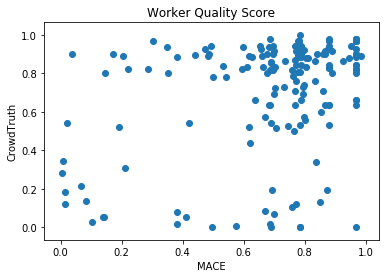

In [64]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.scatter(
    mace_workers["competence"],
    crowdtruth_workers["wqs"],
)

plt.title("Worker Quality Score")
plt.xlabel("MACE")
plt.ylabel("CrowdTruth")

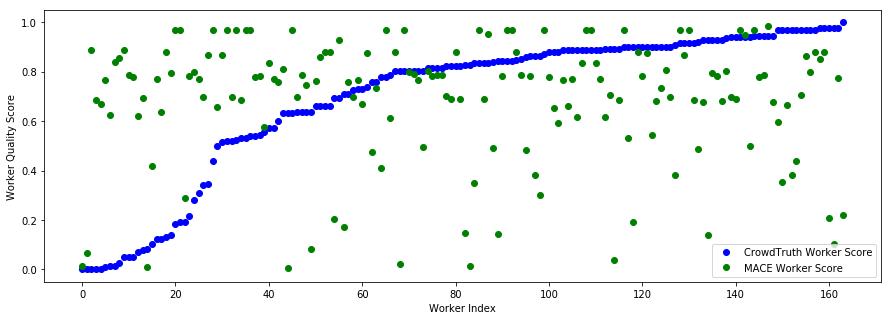

In [65]:
sortWQS = crowdtruth_workers.sort_values(['wqs'], ascending=[1])
sortWQS = sortWQS.reset_index()
worker_ids = list(sortWQS["worker"])

mace_workers = mace_workers.set_index('worker')
mace_workers.loc[worker_ids]

plt.rcParams['figure.figsize'] = 15, 5

plt.plot(np.arange(sortWQS.shape[0]), sortWQS["wqs"], 'bo', lw = 1, label = "CrowdTruth Worker Score")
plt.plot(np.arange(mace_workers.shape[0]), mace_workers["competence"], 'go', lw = 1, label = "MACE Worker Score")

plt.ylabel('Worker Quality Score')
plt.xlabel('Worker Index')
plt.legend()

# CrowdTruth vs. MACE vs. Majority Vote on Annotation Performance

In [66]:
majvote = pd.read_csv("../data/results/majorityvote_units_rte.csv")
mace = pd.read_csv("../data/results/mace_units_rte.csv")
crowdtruth = pd.read_csv("../data/results/crowdtruth_units_rte.csv")

In [82]:
def compute_F1_score(dataset, gt_value, gt_column):
    nyt_f1 = np.zeros(shape=(10, 2))
    for idx in xrange(0, 10):
        thresh = (idx + 1) / 10.0
        tp = 0
        fp = 0
        tn = 0
        fn = 0

        for gt_idx in range(0, len(dataset.index)):
            if dataset['true'].iloc[gt_idx] >= thresh:
                if dataset['gold'].iloc[gt_idx] == 1:
                    tp = tp + 1.0
                else:
                    fp = fp + 1.0
            else:
                if dataset['gold'].iloc[gt_idx] == 1:
                    fn = fn + 1.0
                else:
                    tn = tn + 1.0


        nyt_f1[idx, 0] = thresh
        print(thresh,tp,fp,tn,fn)
        if tp != 0:
            nyt_f1[idx, 1] = 2.0 * tp / (2.0 * tp + fp + fn)
        else:
            nyt_f1[idx, 1] = 0
    return nyt_f1

In [83]:
F1_crowdtruth = compute_F1_score(crowdtruth, 1, 'gold')
F1_crowdtruth

(0.1, 276.0, 264.0, 136.0, 124.0)
(0.2, 179.0, 181.0, 219.0, 221.0)
(0.3, 135.0, 125.0, 275.0, 265.0)
(0.4, 105.0, 95.0, 305.0, 295.0)
(0.5, 105.0, 95.0, 305.0, 295.0)
(0.6, 95.0, 85.0, 315.0, 305.0)
(0.7, 75.0, 65.0, 335.0, 325.0)
(0.8, 64.0, 56.0, 344.0, 336.0)
(0.9, 42.0, 38.0, 362.0, 358.0)
(1.0, 11.0, 9.0, 391.0, 389.0)


array([[0.1       , 0.58723404],
       [0.2       , 0.47105263],
       [0.3       , 0.40909091],
       [0.4       , 0.35      ],
       [0.5       , 0.35      ],
       [0.6       , 0.32758621],
       [0.7       , 0.27777778],
       [0.8       , 0.24615385],
       [0.9       , 0.175     ],
       [1.        , 0.05238095]])

In [79]:
F1_mace = compute_F1_score(mace, 1, 'gold')
F1_mace

(0.1, 371.0, 27.0, 371.0, 373.0)
(0.2, 367.0, 24.0, 367.0, 376.0)
(0.3, 363.0, 22.0, 363.0, 378.0)
(0.4, 362.0, 21.0, 362.0, 379.0)
(0.5, 361.0, 20.0, 361.0, 380.0)
(0.6, 360.0, 19.0, 360.0, 381.0)
(0.7, 359.0, 19.0, 359.0, 381.0)
(0.8, 357.0, 19.0, 357.0, 381.0)
(0.9, 351.0, 17.0, 351.0, 383.0)
(1.0, 6.0, 0, 6.0, 400.0)


array([[0.1       , 0.92982456],
       [0.2       , 0.92793932],
       [0.3       , 0.92484076],
       [0.4       , 0.92464879],
       [0.5       , 0.92445583],
       [0.6       , 0.92426187],
       [0.7       , 0.92287918],
       [0.8       , 0.92010309],
       [0.9       , 0.9140625 ],
       [1.        , 0.02955665]])